## Import required packages 

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset 

In [2]:
df = pd.read_csv('./Fraud.csv')

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Finding NULL values 

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Determining the number of fraud and non-fraud cases 

In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Determining count of fraudulent cases grouped on the type of transaction 

In [55]:
df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

### Plot of transaction types 

          total counts  Percentage
CASH_OUT       2237500    0.351663
PAYMENT        2151495    0.338146
CASH_IN        1399284    0.219923
TRANSFER        532909    0.083756
DEBIT            41432    0.006512


Text(0.5, 1.0, 'Distribution of "type"')

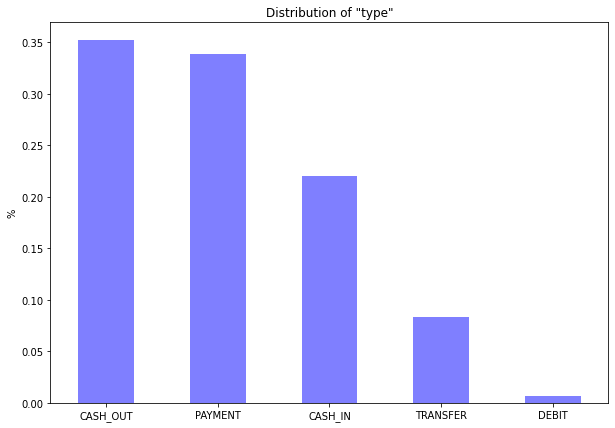

In [57]:
type_counts = pd.DataFrame()
type_counts['total counts'] = df['type'].value_counts()
type_counts['Percentage'] = type_counts['total counts']/type_counts['total counts'].sum()
print(type_counts)

type_counts['Percentage'].plot(kind='bar', rot=0, color='blue', alpha=0.5)
plt.ylabel('%')
plt.title('Distribution of "type"')

### Plot of common transaction amounts 

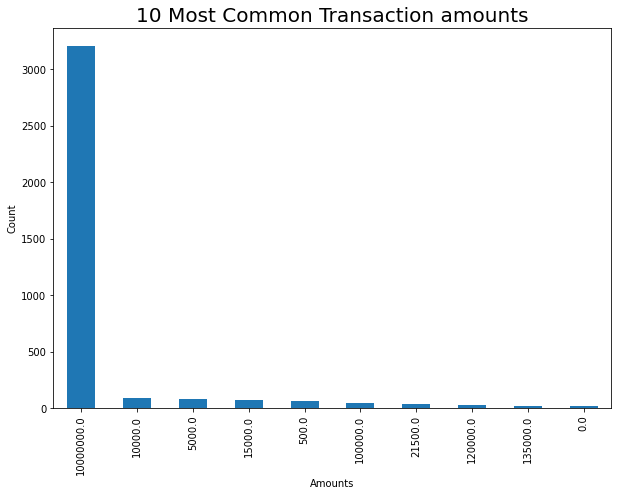

In [16]:
plt.rcParams['figure.figsize'] = (10, 7)
df['amount'].value_counts().head(10).plot.bar()
plt.title('10 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('Count')
plt.show()

### Number of fraudulent transactions in each category 

In [20]:
cashInFrauds = df.loc[(df.isFraud == 1) & (df.type == 'CASH_IN')]
cashOutFrauds = df.loc[(df.isFraud==1) & (df.type=='CASH_OUT')]
transferFrauds = df.loc[(df.isFraud==1) & (df.type=='TRANSFER')]
debitFrauds = df.loc[(df.isFraud==1) & (df.type=='DEBIT')]
paymentFrauds = df.loc[(df.isFraud==1) & (df.type=='PAYMENT')]

print('Number of fraudulent transactions in CASH_IN: {}'.format(len(cashInFrauds)))
print('Number of fraudulent transactions in CASH_OUT: {}'.format(len(cashOutFrauds)))
print('Number of fraudulent transactions in TRANSFER: {}'.format(len(transferFrauds)))
print('Number of fraudulent transactions in DEBIT: {}'.format(len(debitFrauds)))
print('Number of fraudulent transactions in PAYMENT: {}'.format(len(paymentFrauds)))

Number of fraudulent transactions in CASH_IN: 0
Number of fraudulent transactions in CASH_OUT: 4116
Number of fraudulent transactions in TRANSFER: 4097
Number of fraudulent transactions in DEBIT: 0
Number of fraudulent transactions in PAYMENT: 0


### Determining number of flagged fraudulent transactions 

In [28]:
FlaggedFraudTransfer = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
FlaggedFraudCashOut = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'CASH_OUT')]
print("The no. of Flagged Fraudulent Transactions in Transfer:", len(FlaggedFraudTransfer))
print("The no. of Flagged Fraudulent Transactions in Cash_Out:", len(FlaggedFraudCashOut))

print("Minimum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions in Transfer: 16
The no. of Flagged Fraudulent Transactions in Cash_Out: 0
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


### Determining the percentage of fraudulent transactions that are actually flagged 

In [36]:
pd.crosstab(df['isFraud'], df['isFlaggedFraud'], rownames=['isFraud'], colnames=['isFlaggedFraud'])

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


### Plot of non-fraud, fraud and flagged-fraud transactions 

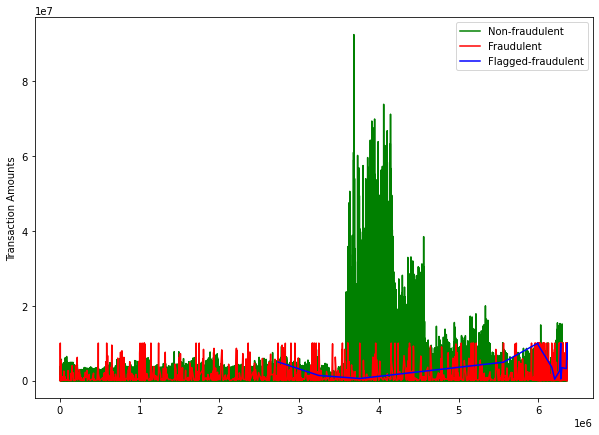

In [59]:
nonFraud = df[df['isFraud'] == 0]
fraud = df[df['isFraud'] == 1]
flaggedFraud = df[df['isFlaggedFraud'] == 1]
plt.plot(nonFraud['amount'], '-', color='g', label='Non-fraudulent')
plt.plot(fraud['amount'], '-', color='r', label='Fraudulent')
plt.plot(flaggedFraud['amount'], '-', color='b', label='Flagged-fraudulent')
plt.ylabel("Transaction Amounts")
plt.legend()

In [61]:
type_counts = pd.DataFrame() 
type_counts['total counts'] = df['type'].value_counts()
type_counts['Actual frauds'] = df[['type','isFraud']].groupby('type').sum()
type_counts['Flagged frauds'] = df[['type','isFlaggedFraud']].groupby('type').sum()
type_counts['%-accuracy'] = type_counts['Flagged frauds'] / type_counts['Actual frauds']
print(type_counts)

          total counts  Actual frauds  Flagged frauds  %-accuracy
CASH_OUT       2237500           4116               0    0.000000
PAYMENT        2151495              0               0         NaN
CASH_IN        1399284              0               0         NaN
TRANSFER        532909           4097              16    0.003905
DEBIT            41432              0               0         NaN


##### Only 2 types have fraudulent transactions, i.e. CASH_OUT and TRANSFER with counts of 4116 & 4097 respectively. But only 16 were flagged correctly, only from the TRANSFER type. 

### Analyzing step trends 

Text(0.5, 1.0, 'Number of frauds - per day')

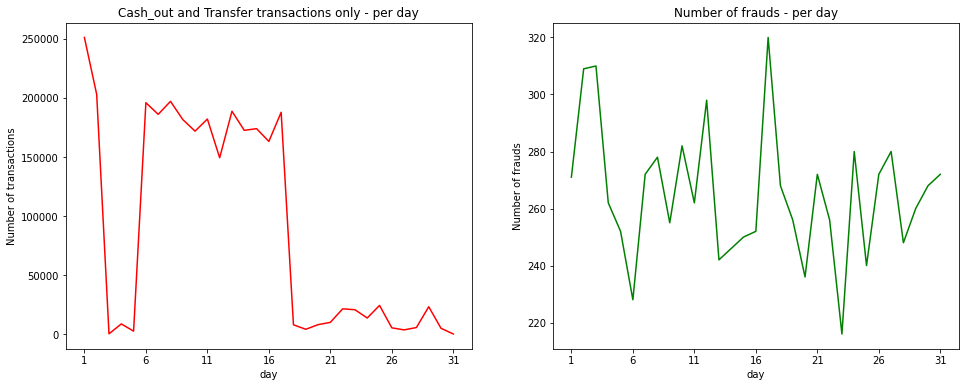

In [77]:
# converting steps to days
df['day'] = pd.cut(df['step'],[0,24,48,72,96,120,144,168,192,216,240,264,288,312,336,360,384,408,432,456,480,504,528,552,576,600,624,648,672,
                      696,720,800], labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
df['count'] = 1
new_df = df.loc[(df.type == 'CASH_OUT') | (df.type == 'TRANSFER')]
time = new_df[['day', 'isFraud', 'amount', 'type', 'count']].groupby('day')
fraud_counts_perDay = pd.DataFrame()
fraud_counts_perDay['total'] = time['count'].sum()
fraud_counts_perDay['frauds'] = time['isFraud'].sum()

plt.figure(figsize=[16,6])
plt.subplot(121)
fraud_counts_perDay['total'].plot(color='r')
plt.ylabel('Number of transactions')
plt.title("Cash_out and Transfer transactions only - per day")

plt.subplot(122)
fraud_counts_perDay['frauds'].plot(color='g')
plt.ylabel('Number of frauds')
plt.title("Number of frauds - per day")

Average % of frauds per day...
0.07425451968796597


Text(0, 0.5, '%')

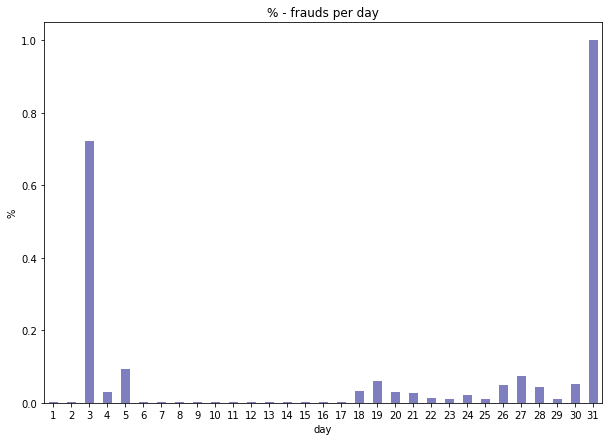

In [80]:
fraud_counts_perDay['percentage'] = (fraud_counts_perDay['frauds'] / fraud_counts_perDay['total'])
print("Average % of frauds per day...")
print(fraud_counts_perDay['percentage'].mean())
fraud_counts_perDay['percentage'].plot(kind='bar', color='navy', alpha=0.5, rot=0)
plt.title("% - frauds per day")
plt.ylabel("%")

### Irregularities in balance 

In [83]:
df['newbal'] = df['oldbalanceOrg'] - df['amount']
df['origbal_diff'] = df['newbal'] != df['newbalanceOrig']
df['newbal_dest'] = df['oldbalanceDest'] + df['amount']
df['destbal_diff'] = df['newbal_dest'] != df['newbalanceDest']
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,count,newbal,origbal_diff,newbal_dest,destbal_diff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,1,160296.36,False,9839.64,True
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1,19384.72,False,1864.28,True
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,1,0.00,False,181.00,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,1,0.00,False,21363.00,True
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,1,29885.86,False,11668.14,True


In [87]:
print('Customers')
print(pd.crosstab(df['isFraud'], df['origbal_diff'], rownames=['isFraud'], colnames=['origbal_diff']))

print('\n\nMerchants')
print(pd.crosstab(df['isFraud'], df['destbal_diff'], rownames=['isFraud'], colnames=['destbal_diff']))

Customers
origbal_diff   False    True 
isFraud                      
0             940537  5413870
1               8086      127


Merchants
destbal_diff    False    True 
isFraud                       
0             1623057  4731350
1                2889     5324


###### Out of 8213 total fraud transactions, there are only 127 fraud transactions where there is irregularity in customers new balance, i.e. only 1.54% of the time, irregularities in customers new balance will be a fraud transaction whereas, it is ~65% for irregularities in merchants new balance.
 

## Data Preprocessing 

In [89]:
X = df[['day','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','origbal_diff','destbal_diff']]
y = df.isFraud

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype   
---  ------          -----   
 0   day             category
 1   type            object  
 2   amount          float64 
 3   oldbalanceOrg   float64 
 4   newbalanceOrig  float64 
 5   oldbalanceDest  float64 
 6   newbalanceDest  float64 
 7   origbal_diff    bool    
 8   destbal_diff    bool    
dtypes: bool(2), category(1), float64(5), object(1)
memory usage: 309.5+ MB


In [93]:
from sklearn.preprocessing import LabelEncoder
list1 = ['type','origbal_diff','destbal_diff']
le = LabelEncoder()
for i in list1:
    X[i] = le.fit_transform(X[i])

<ipython-input-93-b95254f90acf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = le.fit_transform(X[i])


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype   
---  ------          -----   
 0   day             category
 1   type            int32   
 2   amount          float64 
 3   oldbalanceOrg   float64 
 4   newbalanceOrig  float64 
 5   oldbalanceDest  float64 
 6   newbalanceDest  float64 
 7   origbal_diff    int64   
 8   destbal_diff    int64   
dtypes: category(1), float64(5), int32(1), int64(2)
memory usage: 370.1 MB


In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XX = scaler.fit_transform(X) 

## Model Training and Prediction 

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split
def validation_cross(model, x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y, random_state=0, test_size=0.3)
    model.fit(xtrain, ytrain)

    #Predict training set:
    pred = model.predict(xtest)

    #Perform cross-validation:
    cv_score = cross_val_score(model, xtrain, ytrain, cv=5, scoring='accuracy')
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model report:
    print ("\nModel Report on the TRAINING data...")
    print ("Accuracy_score: %.4g" %model.score(xtrain,ytrain))
    print ("CV Score : Mean - %.4g | Std - %.4g" % (np.mean(cv_score),np.std(cv_score)))
    print("")
    
    print ("\nModel Report on the TEST data...")
    print ("Accuracy: %.4g" %(accuracy_score(ytest,pred)))
    print ("RMSE : %.4g" % np.sqrt(mean_squared_error(ytest.values, pred)))
    print ("Classification Report...")
    print (classification_report(ytest,pred))
    cm = confusion_matrix(ytest,pred)
    
    plt.figure(figsize=[10,3])
    plt.subplot(121)
    print ("Confusion Matrix..")
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    print("")

c:\users\annanya pandey\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\annanya pandey\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci


Model Report on the TRAINING data...
Accuracy_score: 0.9993
CV Score : Mean - 0.9997 | Std - 6.319e-06


Model Report on the TEST data...
Accuracy: 0.9994
RMSE : 0.02549
Classification Report...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.96      0.51      0.66      2419

    accuracy                           1.00   1908786
   macro avg       0.98      0.75      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix..



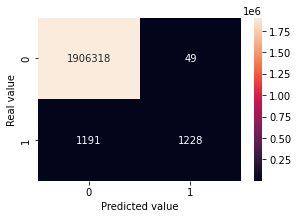

In [98]:
from sklearn.linear_model import LogisticRegression
validation_cross(LogisticRegression(), XX, y)


Model Report on the TRAINING data...
Accuracy_score: 1
CV Score : Mean - 1 | Std - 6.736e-07


Model Report on the TEST data...
Accuracy: 1
RMSE : 0.002289
Classification Report...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       1.00      1.00      1.00      2419

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix..



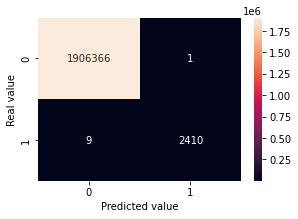

In [100]:
from sklearn.ensemble import RandomForestClassifier 
validation_cross(RandomForestClassifier(), XX, y)